# Quinto punto 
Consulte y programe el algoritmo de $k$ - means. Prográmelo siendo los inputs, el número de grupos, la distancia $p$ con $p=0,1,2, \ldots$, y el número de iteracciones hasta la parada. Suponga que $p=0$ es la distancia de Mahalanobis. Simule 4 muestras aleatorias de distribuciones normales bivariantes con distintas medias, luego haga un análisis de qué distancia tiene un mejor desempeño para clasificar las muestras. (enviar código)

Si tenemos una matriz de datos $X$ con dimensión nxm con n filas y m variables, el algoritmo $k$-means es un algoritmo no supervisado para agrupar los datos en $k$ grupos, aunque ya los algoritmos estan implementados y cada uno cuenta variaciones diferentes, estos son los pasos que se seguiran para implementar el algoritmo.    

1. Definir el número de grupos.

2. Encontrar k centros inciales, estos son importantes pues el algoritmo es iterativo y en este caso los centros seran seleccionados de manera aleatoria con los valores máximos y minimos de cada variable.
 
3. Se inician los siguientes pasos.
    a. Para cada fila se calcula se calcula la distancia (variables ) a los k centros.
    b. A cada fila se le asigna una etiqueta del centro donde se obtuvo la menor distancia 
    c. Se calculan nuevos k centros, donde se calcula el centro (media) de las nuevas etiquetas.
    d. Se repite el paso hasta que los k centros no muestren diferencia significativa.

El número máximo de iteraciones en muchos algoritmos es de 100 y además definen una métrica entre los centros actuales y los anteriores con una tolerancia $10^{-4}$.

El algoritmo se comportira por medio de Git Hub, este algoritmo se define la distancia $p=0,1,2,3$ correspende a la distancia de Mahalanobis, euclidiana, infinita, taxista respectivamente.

In [ ]:
import sklearn.covariance as cov
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# funciones 
def centros_inicial(X:np.array, k:int, num_var:int , semilla:int ):
    """
    Calcula los centros inciales 
    """
    x_min=np.min(X,0)
    x_max=np.max(X,0)
    centros=np.ones( (k,num_var ) ) 
    np.random.seed(semilla)
    for i in range(num_var):
        centros[:,i]= np.random.uniform(x_min[i] ,x_max[i],k )
    return centros 

def mahalanobi(X,center,  covariance_inv):
    """
    distancia de mahalanobis a un punto centro 
    """
    mahalanobis_distances = []
    for row in X:
        distance = np.sqrt((row - center).dot(covariance_inv).dot((row - center).T))
        mahalanobis_distances.append(distance)
    return mahalanobis_distances
def euclidiana(X, center,  covariance_inv ):
    """
    Distancia euclidiana entre dos puntos 
    """
    distancia_euclidiana= np.sqrt(  np.sum((X-center)**2 ,1))   
    
    return distancia_euclidiana 

def infinita(X, center,  covariance_inv ):
    """
    Distancia infinita entre dos puntos 
    """
    distancia_infinita=  np.max( abs(X-center) ,1)   
    
    return distancia_infinita
    
def taxista(X, center,  covariance_inv ):
    """
    Distancia del taxista
    """
    distancia_taxista=np.sum(abs(X-center) ,1)
    
    return distancia_taxista 

def distancias(X, center,  covariance_inv, p ):
    """
    Calcula las distancias de 
    p: 0, mahalanobis; 1, euclidiana; 
       2, infinita; 3, taxista.
    """
    if p==0:
        d=mahalanobi(X,center,  covariance_inv)
    elif p==1:
        d=euclidiana(X, center,  covariance_inv )
    elif p==2:
        d=infinita(X, center,  covariance_inv )
    elif p==3:
        d=taxista(X, center,  covariance_inv )
    else: 
        return 'el p no aplica'
    return d


def centros_inicial(X:np.array, k:int, num_var:int , semilla:int ):
    """
    Calcula los centros inciales 
    """
    x_min=np.min(X,0)
    x_max=np.max(X,0)
    centros=np.ones( (k,num_var ) ) 
    np.random.seed(semilla)
    for i in range(num_var):
        centros[:,i]= np.random.uniform(x_min[i] ,x_max[i],k )
    
    return centros

def kmeans(X:np.array, k:int,p:int,iteraciones:int , semilla:int, tol =1e-4):
    """
    Algoritmo kmeans
    """
    num_var=X.shape[1] # numero de variables
    centros=centros_inicial(X, k, num_var, semilla ) # centros iniciales 
    conteo=1
    var_cov= np.linalg.inv(np.cov(X.T))
    matriz_distancia=np.ones( (X.shape[0], k) )
    conteo= 1 
    error_centros=10
    while error_centros>tol and conteo<=iteraciones:
        for j in range(k):
            matriz_distancia[:,j]= distancias(X, centros[j,:],var_cov,p )
        labels= np.argmin(matriz_distancia, axis=1)
        centros_atras=centros.copy()
        for j in range(k): 
            centros[j,:] = np.mean(X[labels == j,:], axis=0)
        error_centros=np.linalg.norm(centros - centros_atras)
        conteo=conteo+1
    print('Iteraciones:', conteo)
    return labels


## Ejemplo primera muestra

In [18]:

# Muestra 1
n=500
np.random.seed(1)
mu=(-5,100)
sigma= [[3,5],[5,50]]
m= np.random.multivariate_normal( mu, sigma, n)
# Muestra 2
mu1=(1,-50)
sigma1= [[3,-5],[-5,20]]
m1= np.random.multivariate_normal( mu1, sigma1, n)
# Muestra 3
mu2=(5,90)
sigma2= [[3,6],[6,30]]
m2= np.random.multivariate_normal( mu2, sigma2, n)
# Muestra 4
mu3=(13,30)
sigma3= [[5,1],[1,15]]
m3= np.random.multivariate_normal( mu3, sigma3, n)
labels_real= [ *[0]*n,*[1]*n,*[2]*n,*[3]*n  ]
#Muestras unidas 
X = np.concatenate ((m, m1, m2,m3))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1],c=labels_real )
plt.show()


Iteraciones: 5
Iteraciones: 13
Iteraciones: 10
Iteraciones: 9


Text(0.5, 1.0, 'Labels k-means distancia taxista.')

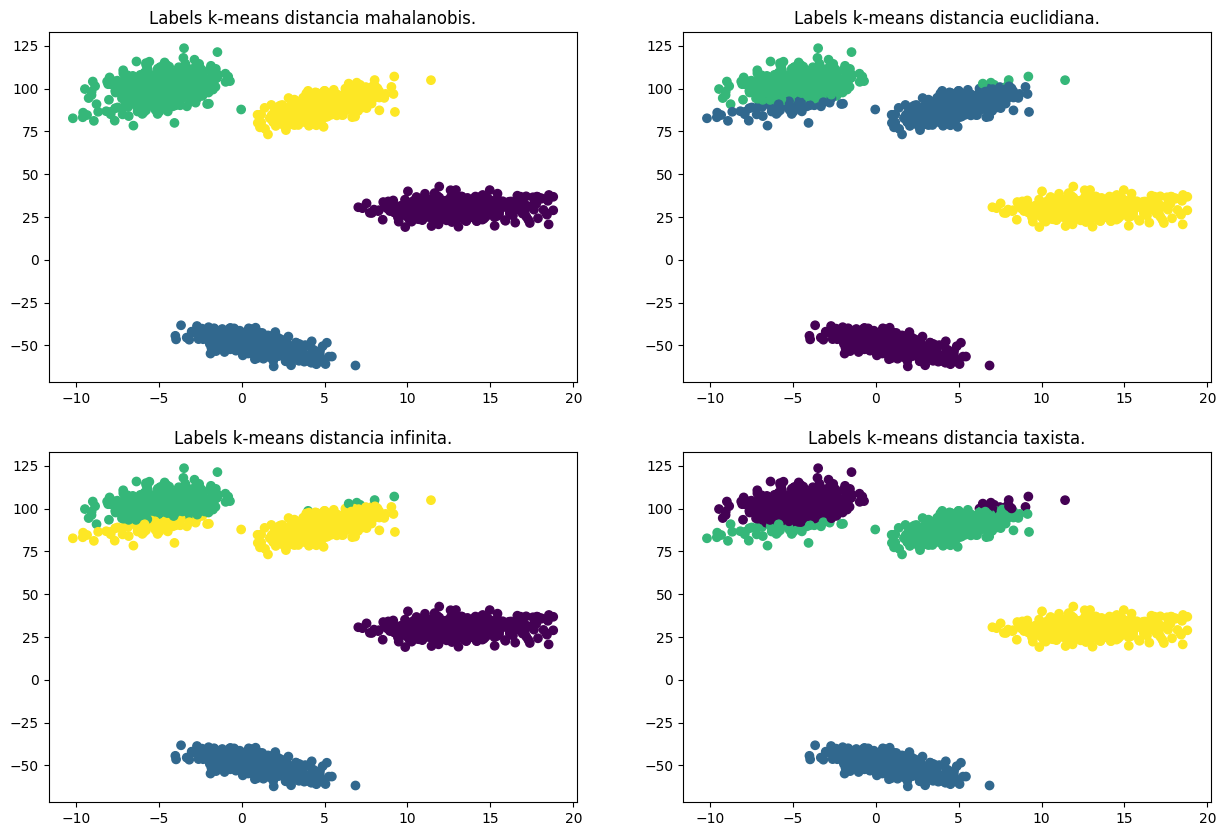

In [41]:
labels_0= kmeans(X, k=4,p=0,iteraciones=100,semilla=123)
labels_1= kmeans(X, k=4,p=1,iteraciones=100,semilla=234)
labels_2= kmeans(X, k=4,p=2,iteraciones=100,semilla=456)
labels_3= kmeans(X, k=4,p=3,iteraciones=100,semilla=567)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X[:,0], X[:,1],c=labels_0 )
plt.title('Labels k-means distancia mahalanobis.')
plt.subplot(222)
plt.scatter(X[:,0], X[:,1],c=labels_1 )
plt.title('Labels k-means distancia euclidiana.')
plt.subplot(223)
plt.scatter(X[:,0], X[:,1],c=labels_2 )
plt.title('Labels k-means distancia infinita.')
plt.subplot(224)
plt.scatter(X[:,0], X[:,1],c=labels_3 )
plt.title('Labels k-means distancia taxista.')

## Ejemplo segunda muestra

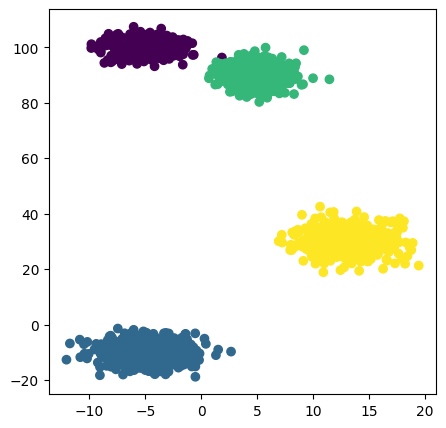

In [48]:
# Muestra 1
n=500
np.random.seed(1)
mu=(-5,100)
sigma= [[3,0],[0,5]]
m= np.random.multivariate_normal( mu, sigma, n)
# Muestra 2
mu1=(-5,-10)
sigma1= [[5,0],[0,10]]
m1= np.random.multivariate_normal( mu1, sigma1, n)
# Muestra 3
mu2=(5,90)
sigma2= [[3,0],[0,10]]
m2= np.random.multivariate_normal( mu2, sigma2, n)
# Muestra 4
mu3=(13,30)
sigma3= [[5,0],[0,15]]
m3= np.random.multivariate_normal( mu3, sigma3, n)
labels_real= [ *[0]*n,*[1]*n,*[2]*n,*[3]*n  ]
#Muestras unidas 
X = np.concatenate ((m, m1, m2,m3))
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1],c=labels_real )
plt.show()

Iteraciones: 4
Iteraciones: 7
Iteraciones: 7
Iteraciones: 20


Text(0.5, 1.0, 'Labels k-means distancia taxista.')

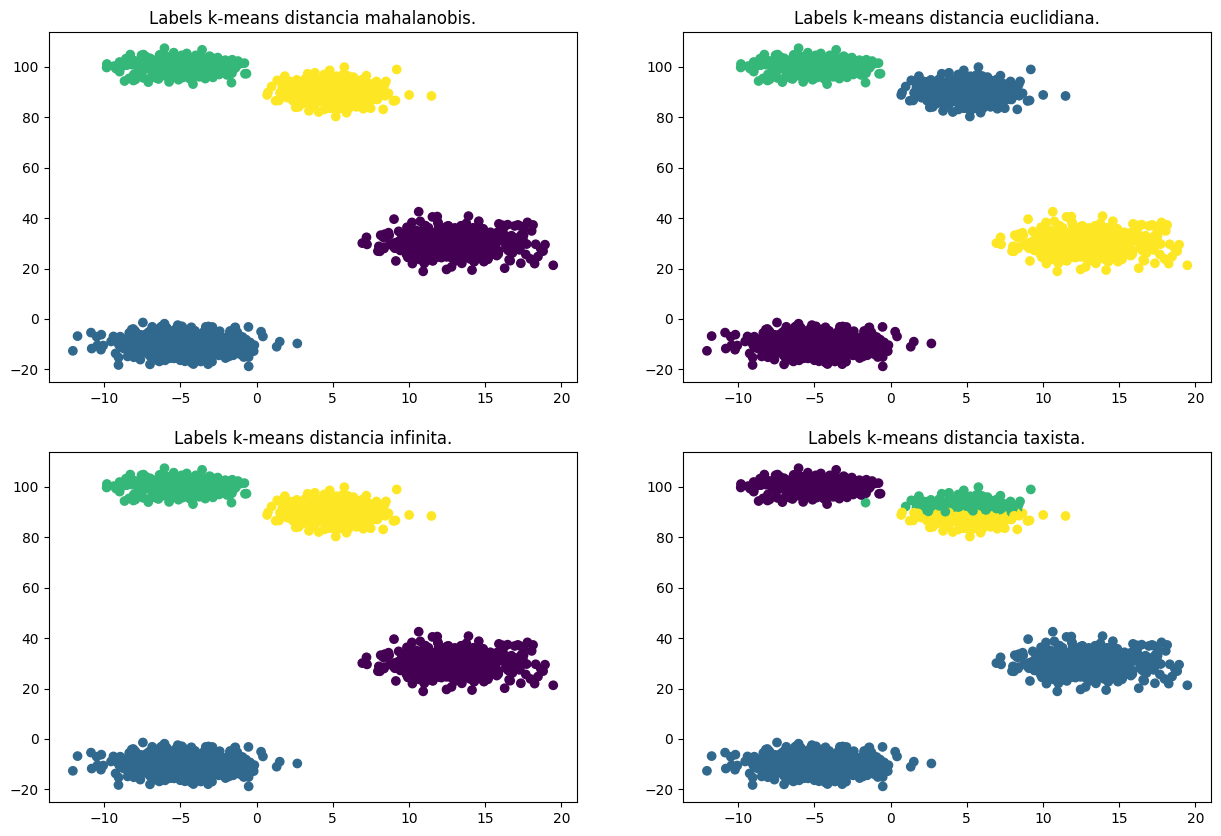

In [49]:
labels_0= kmeans(X, k=4,p=0,iteraciones=100,semilla=123)
labels_1= kmeans(X, k=4,p=1,iteraciones=100,semilla=234)
labels_2= kmeans(X, k=4,p=2,iteraciones=100,semilla=456)
labels_3= kmeans(X, k=4,p=3,iteraciones=100,semilla=567)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X[:,0], X[:,1],c=labels_0 )
plt.title('Labels k-means distancia mahalanobis.')
plt.subplot(222)
plt.scatter(X[:,0], X[:,1],c=labels_1 )
plt.title('Labels k-means distancia euclidiana.')
plt.subplot(223)
plt.scatter(X[:,0], X[:,1],c=labels_2 )
plt.title('Labels k-means distancia infinita.')
plt.subplot(224)
plt.scatter(X[:,0], X[:,1],c=labels_3 )
plt.title('Labels k-means distancia taxista.')

# Decimocuarto punto 

In [51]:
from sklearn.covariance import LedoitWolf, empirical_covariance
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

Text(0.5, 1.0, 'Estimación covarianza Ledoit-Wolf.')

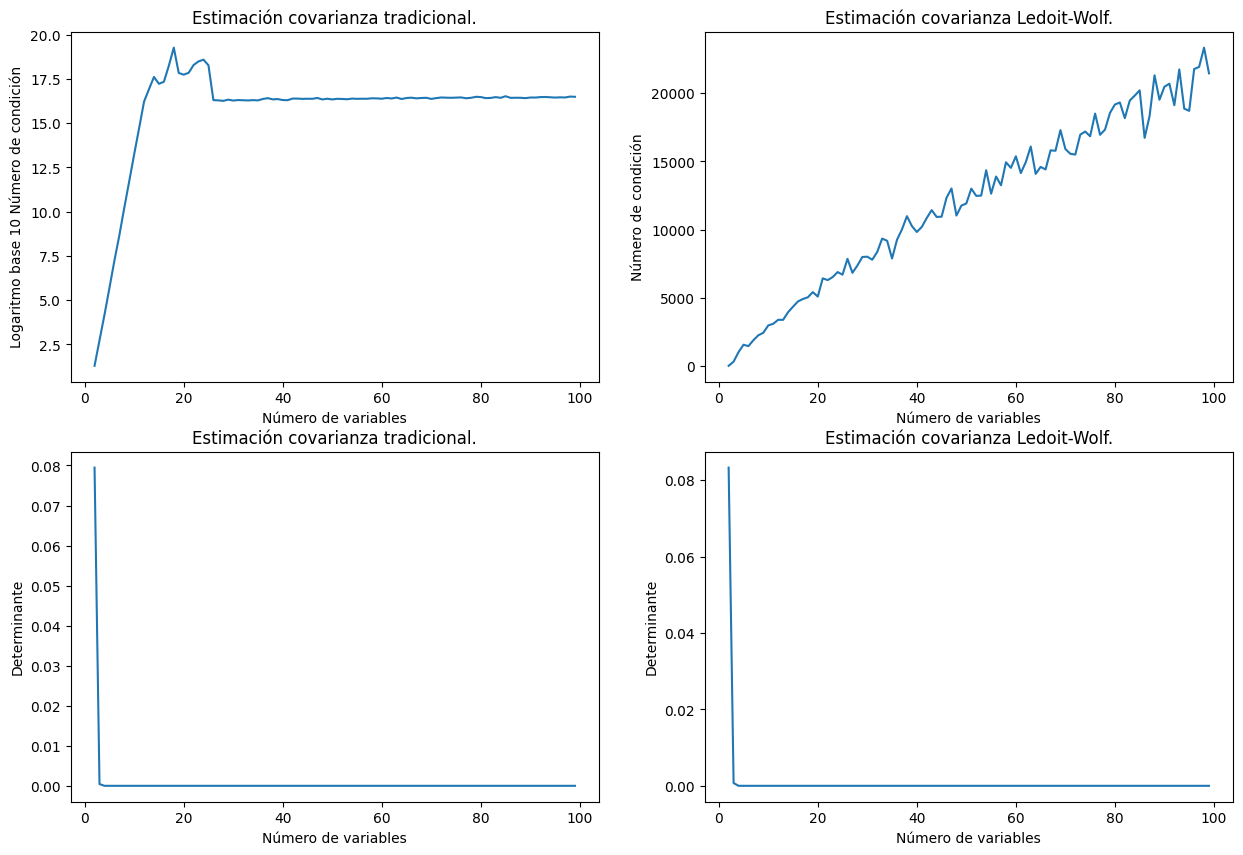

In [56]:
def hilbert(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)
    return H


size_=1000
numero_condicion=[]
determinante=[]
numero_condicion_wolf=[]
determinante_wolf=[]
variables= range(2, 100 )
for i in variables:
    H_n=hilbert(i)
    np.random.seed(i) # semilla  
    X= np.random.multivariate_normal(np.zeros(i),H_n,size_)
    cova = empirical_covariance(X )
    cova_wolf=LedoitWolf().fit(X).covariance_
    numero_condicion_wolf.append( np.linalg.cond(cova_wolf ))
    numero_condicion.append( np.linalg.cond(cova )  )
    determinante.append(np.linalg.det(cova))
    determinante_wolf.append(np.linalg.det(cova_wolf)  )
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0,0].plot(variables,np.log10(np.array(numero_condicion) ) )
axis[0,0].set_xlabel('Número de variables')
axis[0,0].set_ylabel('Logaritmo base 10 Número de condición')
axis[0,0].set_title('Estimación covarianza tradicional.')
axis[0,1].plot(variables,numero_condicion_wolf)
axis[0,1].set_xlabel('Número de variables')
axis[0,1].set_ylabel('Número de condición')
axis[0,1].set_title('Estimación covarianza Ledoit-Wolf.')
axis[1,0].plot(variables,determinante)
axis[1,0].set_xlabel('Número de variables')
axis[1,0].set_ylabel('Determinante')
axis[1,0].set_title('Estimación covarianza tradicional.')
axis[1,1].plot(variables,determinante_wolf)
axis[1,1].set_xlabel('Número de variables')
axis[1,1].set_ylabel('Determinante')
axis[1,1].set_title('Estimación covarianza Ledoit-Wolf.')

Como podemos observar la covarianza tradicional tiene un mejor comportamiento en comparación con la estimación de shrinkage, a medida que aumenta el número de variables el número de condición se estabiliza, sin embargo, para el caso de shrinkage sigue aumentando. El método tradicional no es un buen estimador para la matriz de varianzas y covarianzas a medida que el número de variables aumenta, ya que la matriz real tiene un número de condición creciente y este método no lo refleja. 

Además para ambos, el número de determinante sigue igual por lo que se puede inferir que hay alta multicolinealidad. 

# Decimoquinto punto 

In [68]:
# resolviendo sistema metodo tradicional
from scipy.linalg import solve_triangular 
x=np.array(range(1,16))
x.shape=(15,1)
h_15=hilbert(15)
b=h_15 @ x
x_new= np.linalg.inv(h_15) @ b
np.linalg.norm(x-x_new ) 

11508.916667320573

Se usa el sistema de ecuación tradicional y luego el metodo de Factorización QR, como medida para mejorar el mal condicionamiento de la matriz, este mejora significativamente pero no lo suficiente para solucionarlo. 

In [69]:
# Facotrización QR 
Q, R=np.linalg.qr( h_15)
x_new_fac=  solve_triangular(R,   Q.T @ b)
np.linalg.norm(x-x_new_fac )

27.413547821607807

En esta transformamos a $H_{15}= QR$ donde $Q$ es una matriz ortogonal y $R$ una triangular, si calculamos la distancia euclidiana obtenemos: 27.4 donde una alternativa para solucionar este tipo de problemas de condición es factorizando la matriz y se observa que la factorización llega a reducir significativamente.

# Decimosexto punto 

In [71]:
def Vandermonde(n):
  np.random.random(1)
  #creacion de matriz de Vandermonde 
  X=np.random.normal(5,1, n ) 
  X.shape=(n,1)
  A=X**0
  for i in range(1,n ):
      A=np.concatenate((A,X**i ) ,axis=1)
  return A

Text(0.5, 1.0, 'Estimación covarianza Ledoit-Wolf.')

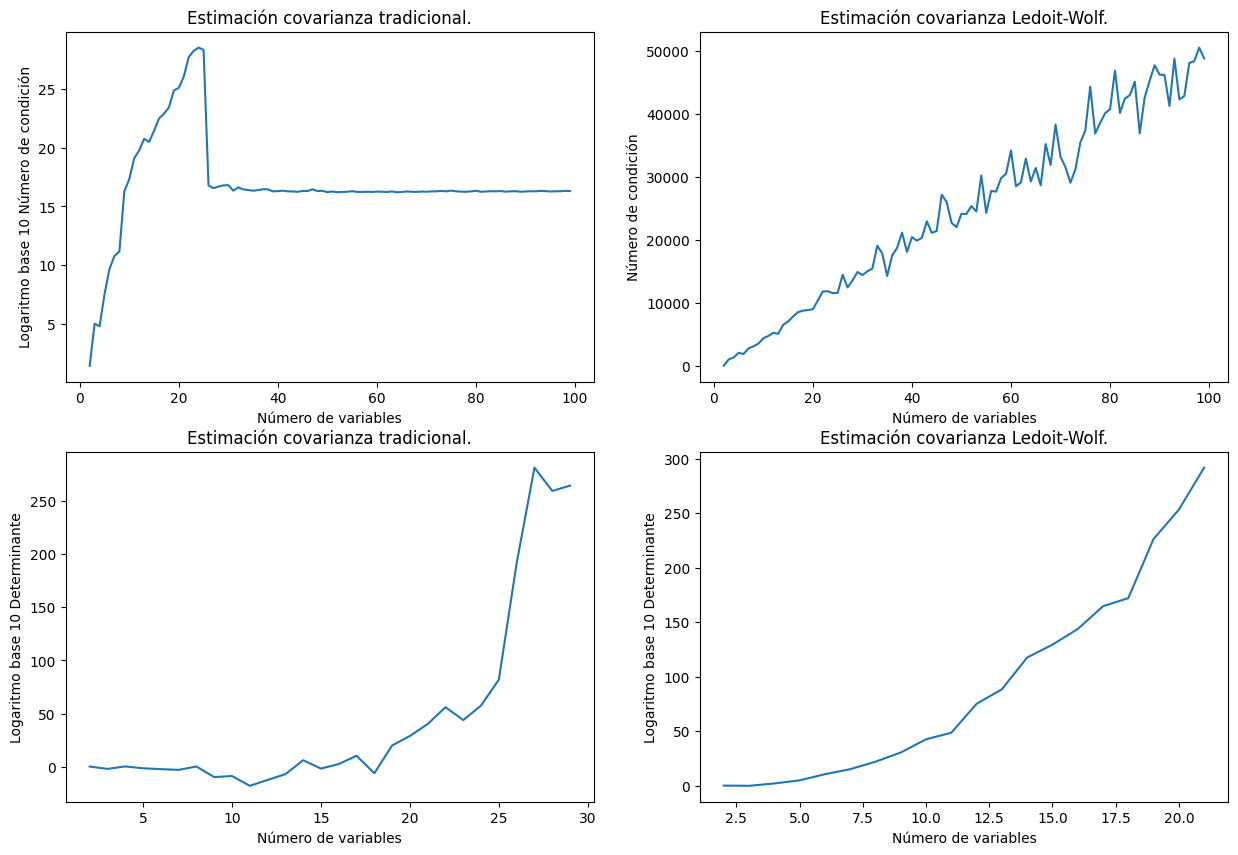

In [76]:
import warnings; warnings.simplefilter('ignore')
size_=1000
numero_condicion=[]
determinante=[]
numero_condicion_wolf=[]
determinante_wolf=[]
variables= range(2, 100 )
numero_condicion_V=[]
for i in variables:
    V_n=Vandermonde(i)
    np.random.seed(i) # semilla  
    X= np.random.multivariate_normal(np.zeros(i),V_n,size_)
    cova = empirical_covariance(X)
    cova_wolf=LedoitWolf().fit(X).covariance_
    numero_condicion_wolf.append( np.linalg.cond(cova_wolf ))
    numero_condicion.append( np.linalg.cond(cova )  )
    determinante.append(np.linalg.det(cova))
    determinante_wolf.append(np.linalg.det(cova_wolf)  )

figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0,0].plot(variables,np.log10(np.array(numero_condicion) ) )
axis[0,0].set_xlabel('Número de variables')
axis[0,0].set_ylabel('Logaritmo base 10 Número de condición')
axis[0,0].set_title('Estimación covarianza tradicional.')
axis[0,1].plot(variables,numero_condicion_wolf)
axis[0,1].set_xlabel('Número de variables')
axis[0,1].set_ylabel('Número de condición')
axis[0,1].set_title('Estimación covarianza Ledoit-Wolf.')
axis[1,0].plot(variables,np.log10(np.array(determinante)) )
axis[1,0].set_xlabel('Número de variables')
axis[1,0].set_ylabel('Logaritmo base 10 Determinante')
axis[1,0].set_title('Estimación covarianza tradicional.')
axis[1,1].plot(variables,np.log10(np.array(determinante_wolf)))
axis[1,1].set_xlabel('Número de variables')
axis[1,1].set_ylabel('Logaritmo base 10 Determinante')
axis[1,1].set_title('Estimación covarianza Ledoit-Wolf.')

In [78]:
# resolviendo sistema metodo tradicional 
x=np.array(range(1,16))
x.shape=(15,1)
V_15=Vandermonde(15)
b=V_15 @ x
x_new= np.linalg.inv(V_15) @ b
np.linalg.norm(x-x_new ) 

1855164473217.7058

In [79]:
Q, R=np.linalg.qr( V_15)
x_new_fac=  solve_triangular(R,   Q.T @ b)
np.linalg.norm(x-x_new_fac )

4041823648.5301876